In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [5]:
df = pd.read_csv("Student.csv")   # make sure Student.csv is in the same folder

print("First 5 rows:")
print(df.head())
print("\nColumns:", df.columns.tolist())

# List of subject columns (from your file)
subjects = ["Maths", "Physics", "Chemistry"]


First 5 rows:
   Maths  Physics  Chemistry  Result
0     17       27         22       0
1     72       82         77       1
2     97       18         13       0
3      8       42         37       0
4     32       25         20       0

Columns: ['Maths', 'Physics', 'Chemistry', 'Result']


In [6]:
# Assume each subject is out of 100
df["total_marks"] = df[subjects].sum(axis=1)
df["percentage"] = df["total_marks"] / (len(subjects) * 100) * 100

# Result column: 1 = Pass, 0 = Fail (from your file)
df["status"] = df["Result"].map({1: "Pass", 0: "Fail"})

# Create a simple Student ID since there is no name/id in file
df["student_id"] = np.arange(1, len(df) + 1)

print("\nData with new columns:")
print(df.head())


Data with new columns:
   Maths  Physics  Chemistry  Result  total_marks  percentage status  \
0     17       27         22       0           66   22.000000   Fail   
1     72       82         77       1          231   77.000000   Pass   
2     97       18         13       0          128   42.666667   Fail   
3      8       42         37       0           87   29.000000   Fail   
4     32       25         20       0           77   25.666667   Fail   

   student_id  
0           1  
1           2  
2           3  
3           4  
4           5  


In [7]:
print("\n=== Overall Summary (Numerical Columns) ===")
print(df.describe())

print("\n=== Pass / Fail Count (from Result column) ===")
print(df["status"].value_counts())

print("\n=== Subject-wise Mean Marks ===")
subject_means = df[subjects].mean().sort_values(ascending=False)
print(subject_means)

print("\n=== Subject-wise Min & Max Marks ===")
print(df[subjects].agg(["min", "max"]).T)

# ------------ 4. TOP & LOW PERFORMERS (OVERALL) ------------

# Top 5 students based on percentage
top_students = df.sort_values(by="percentage", ascending=False).head(5)
print("\n=== Top 5 Students (Overall) ===")
print(top_students[["student_id", "Maths", "Physics", "Chemistry", "percentage", "status"]])

# Bottom 5 students
low_students = df.sort_values(by="percentage", ascending=True).head(5)
print("\n=== Bottom 5 Students (Overall) ===")
print(low_students[["student_id", "Maths", "Physics", "Chemistry", "percentage", "status"]])


=== Overall Summary (Numerical Columns) ===
             Maths      Physics    Chemistry       Result  total_marks  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     50.842000    52.316000    52.239000     0.245000   155.397000   
std      29.238775    24.801114    27.397052     0.430302    46.271616   
min       0.000000    10.000000     5.000000     0.000000    30.000000   
25%      26.000000    31.000000    29.750000     0.000000   123.750000   
50%      51.000000    51.000000    53.000000     0.000000   156.000000   
75%      76.000000    74.000000    76.000000     0.000000   188.000000   
max     100.000000    95.000000    99.000000     1.000000   280.000000   

        percentage   student_id  
count  1000.000000  1000.000000  
mean     51.799000   500.500000  
std      15.423872   288.819436  
min      10.000000     1.000000  
25%      41.250000   250.750000  
50%      52.000000   500.500000  
75%      62.666667   750.250000  
max      93.3333

In [8]:
def subject_toppers(df, subject, n=3):
    print(f"\n=== Top {n} in {subject} ===")
    print(df.sort_values(by=subject, ascending=False)
            .head(n)[["student_id", subject]])
    print(f"\n=== Bottom {n} in {subject} ===")
    print(df.sort_values(by=subject, ascending=True)
            .head(n)[["student_id", subject]])

for s in subjects:
    subject_toppers(df, s, n=3)


=== Top 3 in Maths ===
     student_id  Maths
435         436    100
394         395    100
850         851    100

=== Bottom 3 in Maths ===
     student_id  Maths
715         716      0
22           23      0
141         142      0

=== Top 3 in Physics ===
     student_id  Physics
889         890       95
974         975       95
257         258       95

=== Bottom 3 in Physics ===
     student_id  Physics
699         700       10
680         681       10
663         664       10

=== Top 3 in Chemistry ===
     student_id  Chemistry
131         132         99
603         604         99
864         865         99

=== Bottom 3 in Chemistry ===
     student_id  Chemistry
972         973          5
670         671          5
150         151          5


In [9]:
difficulty_data = []

for subj in subjects:
    avg = df[subj].mean()
    # treat < 40 as fail in that subject
    fail_count = (df[subj] < 40).sum()
    pass_count = (df[subj] >= 40).sum()
    difficulty_data.append({
        "subject": subj,
        "avg_marks": avg,
        "fail_count": fail_count,
        "pass_count": pass_count
    })

difficulty_df = pd.DataFrame(difficulty_data)
difficulty_df["fail_rate_%"] = difficulty_df["fail_count"] / (difficulty_df["fail_count"] + difficulty_df["pass_count"]) * 100

print("\n=== Subject-wise Difficulty Table ===")
print(difficulty_df.sort_values(by=["avg_marks", "fail_rate_%"], ascending=[True, False]))


=== Subject-wise Difficulty Table ===
     subject  avg_marks  fail_count  pass_count  fail_rate_%
0      Maths     50.842         394         606         39.4
2  Chemistry     52.239         371         629         37.1
1    Physics     52.316         346         654         34.6


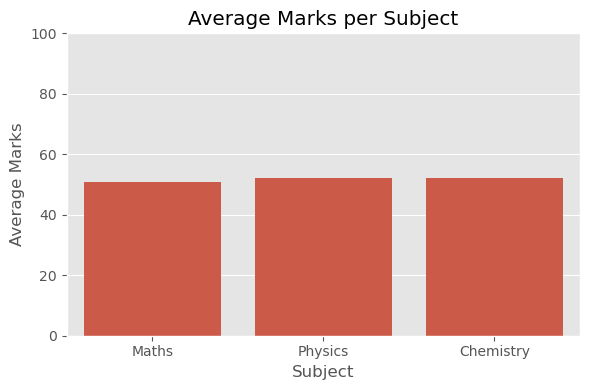

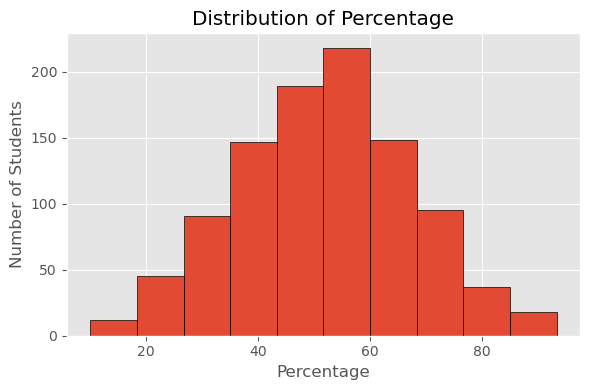

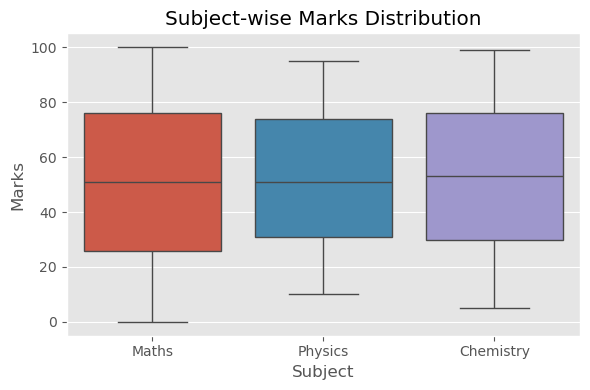

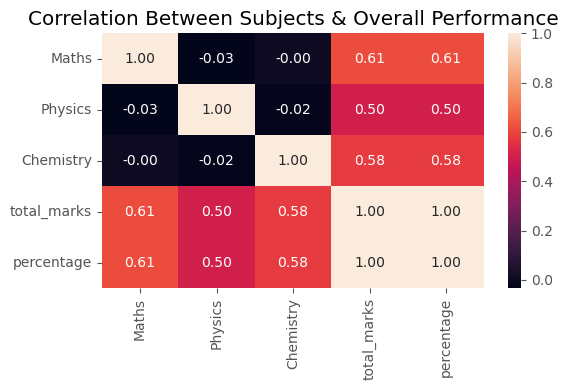

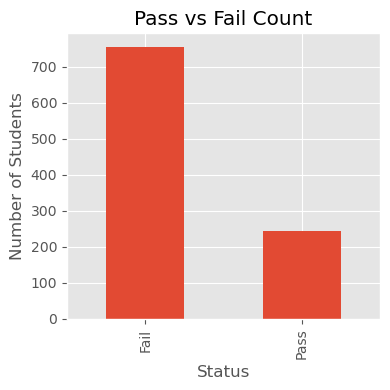

In [10]:
# 7.1 Average marks per subject
plt.figure(figsize=(6, 4))
sns.barplot(x="subject", y="avg_marks", data=difficulty_df)
plt.title("Average Marks per Subject")
plt.xlabel("Subject")
plt.ylabel("Average Marks")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

# 7.2 Percentage distribution
plt.figure(figsize=(6, 4))
plt.hist(df["percentage"], bins=10, edgecolor="black")
plt.title("Distribution of Percentage")
plt.xlabel("Percentage")
plt.ylabel("Number of Students")
plt.tight_layout()
plt.show()

# 7.3 Subject-wise marks distribution (boxplot)
plt.figure(figsize=(6, 4))
sns.boxplot(data=df[subjects])
plt.title("Subject-wise Marks Distribution")
plt.xlabel("Subject")
plt.ylabel("Marks")
plt.tight_layout()
plt.show()

# 7.4 Correlation heatmap
plt.figure(figsize=(6, 4))
corr = df[subjects + ["total_marks", "percentage"]].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Between Subjects & Overall Performance")
plt.tight_layout()
plt.show()

# 7.5 Pass/Fail count bar chart
plt.figure(figsize=(4, 4))
df["status"].value_counts().plot(kind="bar")
plt.title("Pass vs Fail Count")
plt.xlabel("Status")
plt.ylabel("Number of Students")
plt.tight_layout()
plt.show()